# Homework 3

# Task 1 (No coding, ura!)

# Task 2 (Coding)

You should find:
1. simulate this mechanism (obtain all positions);
2. Find absolute, transport and relative velocities and accelerations for M;
3. Find t, when M reaches O point;
4. draw plots $v_{rel}, v_{tr}, a_{tr}, a_{rel}, a$ respect to time.

Needed variables:
$\phi_e = f_1(t) = 0.2t^3 + t;$
$OM = s_r = f_2(t) = 5\sqrt2(t^2 + t)$
$a = 60, α = 45.$


In [169]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import solve, diff, sin, cos, lambdify, sqrt, atan, asin
from sympy.abc import symbols
from IPython.display import HTML, display

num_frames = 120
t_start = 0
t_end = 3
t_values = np.linspace(t_start, t_end, num_frames)

O1O = 60
alpha = np.radians(45)

# Set the needed variables for further solving using sympy
t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, O1M, OM, O1M1 = symbols('t, phi, x_M, y_M, k_OO2, b_OO2, px1, px2, py1, py2, k, b, O1M, OM, O1M1')


def eq_to_lambda_OO2(*args):
  lambdas = []
  for func in args:
    lambdas.append(lambdify([(px1, py1, px2, py2)], func))

  return lambdas

def eq_to_lambda_O1M(*args):
  lambdas = []
  for func in args:
    lambdas.append(lambdify([(k, b, O1M)], func))

  return lambdas

def multify(params, *args):
    lambdas = []
    for func in args:
        lambdas.append(lambdify([params], func))

    return lambdas


phi_ = lambdify(t, 0.2 * (t ** 3) + t)

func_ang_vel_tr = 0.6 * (t ** 2) + 1
ang_vel_tr_ = lambdify(t, func_ang_vel_tr)

func_rel_vel_M = 10 * sqrt(2) * t + 5 * sqrt(2)
rel_vel_M_ = lambdify(t, func_rel_vel_M)

acc_rel_M = 10 * sqrt(2) #const value 

func_acc_tang_M = 1.2 * t * O1M # formula epsilon * O1M
acc_tang_M_ = multify((t, O1M), func_acc_tang_M)[0]

func_acc_norm_M = (O1M * (0.6 * (t ** 2) + 1))**2 / O1M # formula V_tr^2/O1M
acc_norm_M_ = multify((t, O1M), func_acc_norm_M)[0]

func_acc_cor = 10 * sqrt(2) * (0.6 * t**2 + 1) * (t + 1)
acc_cor_ = lambdify(t, func_acc_cor)

# Gives the length of the OM
func_len_OM = 5 * sqrt(2) * (t**2 + t)
len_OM_ = lambdify(t, func_len_OM)

# Gives the length of O1M
func_len_O1M = sqrt(O1O**2 + OM**2 - 2 * O1O * OM * cos(alpha))
len_O1M_ = lambdify(OM, func_len_O1M)

# Finds coordinates of point O
func_x_O = O1O*cos(phi)
func_y_O = O1O*sin(phi)
x_O_, y_O_ = lambdify(phi, func_x_O), lambdify(phi, func_y_O)

# Finds coordinates of point O2
func_x_O2 = O1O*cos(phi + np.radians(90))
func_y_O2 = O1O*sin(phi + np.radians(90))
x_O2_, y_O2_ = lambdify(phi, func_x_O2), lambdify(phi, func_y_O2)


In [171]:
# Set up the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-70, 70)
ax.set_ylim(-70, 70)

traj, = ax.plot([], [], color='deepskyblue', linestyle='--', lw = 2, label="M traj.")
line_O1O, = ax.plot([], [], 'r', lw = 2, label="O1O")
line_O1O2, = ax.plot([], [], 'g', lw = 2, label="O1O2")
line_OO2, = ax.plot([], [], color='gold', linestyle='--', lw = 2, label="OO2")
line_O1M, = ax.plot([], [], 'b--', lw = 2, label="O1M")
afull, = ax.plot([], [], 'm', lw = 2, label="afull")

point_M, = ax.plot([], [], 'bo', markersize = 5)
point_O, = ax.plot([], [], 'ro', markersize = 5)
point_O2, = ax.plot([], [], 'go', markersize = 5)




vel_tr_M_values = []
vel_rel_M_values = []
acc_rel_M_values = []
acc_tr_M_values = []
acc_full_values = []

def update(frame):
    phi = phi_(t_values[frame])
    x_O, y_O = x_O_(phi), y_O_(phi)
    point_O.set_data(x_O, y_O)
    
    x_O2, y_O2 = x_O2_(phi), y_O2_(phi)
    point_O2.set_data(x_O2, y_O2)
    
    OM = len_OM_(t_values[frame])
    O1M = len_O1M_(OM)    
    
    angle_gamma_minus_phi = np.arcsin(np.sin(alpha)*OM / O1M) + phi
    x_M = O1M * cos(angle_gamma_minus_phi)
    y_M = O1M * sin(angle_gamma_minus_phi)
    
    traj.set_data(np.append(traj.get_xdata(), x_M), np.append(traj.get_ydata(), y_M))
    line_O1O.set_data([0, x_O], [0, y_O])
    line_O1O2.set_data([0, x_O2], [0, y_O2])
    line_OO2.set_data([x_O, x_O2], [y_O, y_O2])
    line_O1M.set_data([0, x_M], [0, y_M])
    
    point_M.set_data((x_M, y_M))
    
    acc_tr_tau = acc_tang_M_((t_values[frame], O1M))
    acc_tr_n = acc_norm_M_((t_values[frame], O1M))
    acc_cor = acc_cor_((t_values[frame]))
    
    acc_x_full = acc_tr_tau*sin(angle_gamma_minus_phi) + acc_tr_n*cos(angle_gamma_minus_phi) + acc_cor*cos(angle_gamma_minus_phi) + acc_rel_M*cos(alpha - phi)
    acc_y_full = acc_tr_tau*cos(angle_gamma_minus_phi) - acc_tr_n*sin(angle_gamma_minus_phi) - acc_cor*sin(angle_gamma_minus_phi) + acc_rel_M*sin(alpha - phi)
    
    # Update the values
    vel_tr_M_values.append(ang_vel_tr_((t_values[frame])) * O1M) # the formula is omega * R 
    vel_rel_M_values.append(rel_vel_M_((t_values[frame])))
    acc_rel_M_values.append(acc_rel_M) # the value is const,therefore it is a line y = a_rel_M 
    acc_tr_M_values.append(sqrt(acc_tr_tau**2 + acc_tr_n**2)) # a_tr_full^2 = a_t^2 + a_n^2
    acc_full_values.append(sqrt(acc_x_full**2 + acc_y_full**2))
    
    # If you want to see the full acceleration on the simulation uncomment this part
    # scale_factor = 0.008
    # '-' since x in the report is directed to the left
    # afull.set_data([x_M, -acc_x_full*scale_factor], [y_M, acc_y_full*scale_factor])
    
    return ...


plt.title('Triangle with a tube rotates')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc=(1.005, 0.65))
    
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=40)

plt.gca().set_aspect(aspect='equal', adjustable='box')    
plt.grid(True)
# ani.save("task2_sim.gif")
display(HTML(ani.to_jshtml()))
plt.close(fig)


C:\Users\User\AppData\Local\Temp\ipykernel_14828\3584378824.py:29: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O.set_data(x_O, y_O)
C:\Users\User\AppData\Local\Temp\ipykernel_14828\3584378824.py:32: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_O2.set_data(x_O2, y_O2)
C:\Users\User\AppData\Local\Temp\ipykernel_14828\3584378824.py:47: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point_M.set_data((x_M, y_M))
C:\Users\User\AppData\Local\Temp\ipykernel_14828\3584378824.py:37: RuntimeWarning: invalid value encountered in arcsin
  angle_gamma_minus_phi = np.arcsin(np.sin(alpha)*OM / O1M) + phi
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook.py:1345: RuntimeWarning: i

## Plots

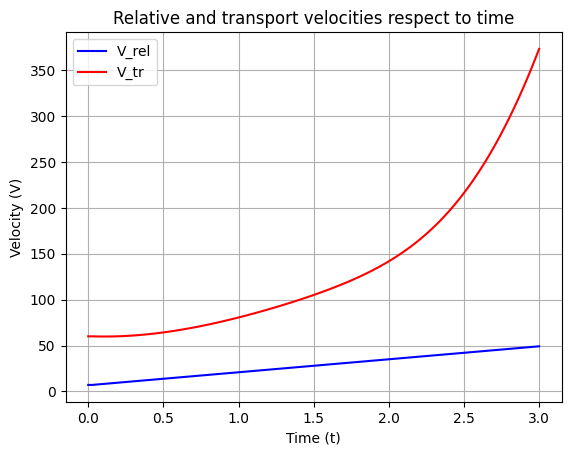

In [172]:
# We need to do this since in the update function we get one more frame
vel_rel_M_values = vel_rel_M_values[:num_frames]
vel_tr_M_values = vel_tr_M_values[:num_frames]

plt.plot(t_values, vel_rel_M_values, label="V_rel", color="blue")
plt.plot(t_values, vel_tr_M_values, label="V_tr", color="red")
plt.title('Relative and transport velocities respect to time')
plt.xlabel('Time (t)')
plt.ylabel('Velocity (V)')
plt.grid(True)
plt.legend()
plt.savefig("task2_plot_vel.jpg")

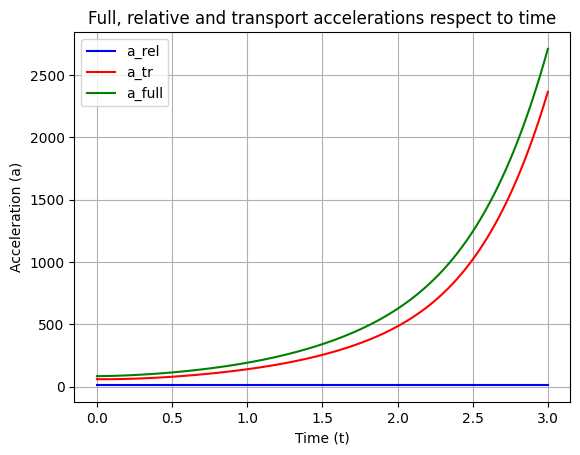

In [173]:
# We need to do this since in the update function we get one more frame
acc_rel_M_values = acc_rel_M_values[:num_frames]
acc_tr_M_values = acc_tr_M_values[:num_frames]
acc_full_values = acc_full_values[:num_frames]

plt.plot(t_values, acc_rel_M_values, label="a_rel", color="blue")
plt.plot(t_values, acc_tr_M_values, label="a_tr", color="red")
plt.plot(t_values, acc_full_values, label="a_full", color="green")
plt.title('Full, relative and transport accelerations respect to time')
plt.xlabel('Time (t)')
plt.ylabel('Acceleration (a)')
plt.grid(True)
plt.legend()
plt.savefig("task2_plot_acc.jpg")